# Aula 6 - Exercícios - Pandas Parte 3 (Merge e Join)

In [1]:
# #@title Init Cell - Execute-me!!!
pkg = !pip list | grep 'ipynb-autograde'
if not pkg or pkg[0].replace('  ','').split(' ')[1]!='0.0.35':
  !pip install ipynb_autograde==0.0.35
%env  COURSE python_tribosgd
from ipynb_autograde.main import init_log, validate
init_log()
email_result=!gcloud config get-value account
if not email_result or 'unset' in email_result[0]:
  !gcloud auth login

     |████████████████████████████████| 235kB 8.3MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
  Created wheel for ipynb-autograde: filename=ipynb_autograde-0.0.35-cp37-none-any.whl size=934302 sha256=083bc62b66b86fa1797c6c08015473626c1813e2f617a570d8f9a4884e131d7b
  Stored in directory: /root/.cache/pip/wheels/03/cf/3f/7f40aac7e86da17407aeea31c4f47b9eacb8ebeff86979fe0e
Successfully built ipynb-autograde
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
env: COURSE=python_tribosgd
Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.

In [12]:
# Importe a biblioteca pandas 
import pandas as pd
import numpy as np

### 6.1 Escreva uma função para fazer o merge dos dataframes de população e de PIB de 2017. A função deve receber como parâmetro o caminho para cada um dos dataframes. Na operação de merge, o pandas renomeará as colunas municipio para municipio_x e municipio_y. Mantenha esses dois nomes de coluna, pois eles serão usados em exercícios posteriores.

#### Dica 1: Você já resolveu uma parte deste problema nos exercícios 6.2 e 6.3. Reaproveite o código copiando e colando aqui, ou refaça-o.
#### Dica 2: A coluna que contem o código IBGE do município deve ter o mesmo formato (string) e a mesma quantidade de caracteres nas duas tabelas.
#### Dica 3: Converta o codigo do município para string ao carregar o dataframe de população utilizando o mapeamento de tipos dtype={'cod_munic': str, 'cod_uf': str}. Assim o codigo do municipio não perde os zeros a esquerda.
#### Dica 4: Concatene o codigo da UF com o código do município usando o operador + e salve em outra coluna.
#### Dica 5: Use o código apresentado na aula para carregar o dataframe do PIB de 2017, especifique o dtype da coluna que contém o codigo do municipio.
#### Dica 6: Renomeie as colunas apropriadamente antes de fazer o merge. A coluna com o nome do municipio deve se chamar municipio (sem acento) e a coluna com o codigo ibge de 7 caracteres cod_ibge7. Veja o exemplo: {'Unnamed: 0': 'nivel', 'Unnamed: 1': 'cod_ibge7', 'Unnamed: 2': 'municipio'}. 
#### Dica 7: Depois que os dois dataframes tiverem o codigo ibge (com valores equivalentes  e mesmo tipo de dados) você pode fazer o merge.


In [ ]:
# Faca aqui seus testes do Exercício 6.1
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'


In [13]:
# Faca aqui sua função do Exercício 6.1
def merge_pop_pib(path_pop, path_pib):
    """retorne um dataframe resultante do merge dos dados do pib e da população
    """
    ### BEGIN SOLUTION
    df_pop = pd.read_excel(path_pop, sheet_name="Municipios", dtype={'cod_munic': str, 'cod_uf': str})
    # Concatena o codigo da UF com o codigo do municipio
    df_pop['cod_ibge7'] = df_pop['cod_uf'] + df_pop['cod_munic']
    df_pib = pd.read_excel(path_pib, skiprows=3, skipfooter=1, dtype={'Unnamed: 1': str})
    df_pib.rename(columns={'Unnamed: 0': 'nivel', 'Unnamed: 1': 'cod_ibge7', 
                           'Unnamed: 2': 'municipio'}, inplace=True)

    return pd.merge(df_pop, df_pib, on='cod_ibge7')
    ### END SOLUTION


In [14]:
# Faca aqui a validacao do Exercicio 6.1
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'

entradas = [[path_pop, path_pib]]
saidas = [{'pop2017': 25437, '2017': 498864}]
validate(merge_pop_pib, entradas, lambda x: x.loc[0,['pop2017', '2017']].to_dict(), saidas, "6.1")

(True, 'Parabéns!')

### 6.2 Escreva uma função para calcular o PIB percapita  de 2017 de cada município do Brasil, considerando o dataframe resultante do exercício anterior.
#### Nomeie a coluna do PIB Percapita com 'pib_percapita' e arredonde o resultado para uma casa decimal usando a função ```round```.
#### Dica: Use a função ```round``` dentro de uma função ```apply```.

In [ ]:
# Faca aqui seus testes do Exercício 6.2



In [15]:
# Faca aqui sua função do Exercício 6.2
def pib_percapita(pib_pop):
    """retorne um dataframe contendo o PIB percapita dos municípios.
    """
    ### BEGIN SOLUTION
    pib_pop['pib_percapita'] = pib_pop['2017']/pib_pop['pop2017']
    pib_pop['pib_percapita'] = pib_pop['pib_percapita'].apply(lambda x: round(x, 1))
    return pib_pop
    ### END SOLUTION


In [16]:
# Faca aqui a validacao do Exercicio 6.2
# Considerando a função merge_pop_pib do exercicio 6.1
df_pib_pop = merge_pop_pib(path_pop, path_pib)

entradas = [[df_pib_pop]]
saidas = [19.6]
validate(pib_percapita, entradas, lambda x: x.loc[0,'pib_percapita'], saidas, "6.2")

(True, 'Parabéns!')

### 6.3 Escreva uma função para retornar os registros dos 10 maiores PIBs percapita do brasil (de 2017) a partir do dataframe do exercício anterior. 
#### Escreva uma função genérica que receba como parâmetro um dataframe e o nome da coluna de ordenação.
#### Dica 1: Use o método sort_values para ordenar o dataframe. Para uma ordenação descendente use ascending=False.
#### Dica 2: Use o atributo iloc para retornar todas as colunas dos 10 primeiros registros.

In [ ]:
# Faca aqui seus testes do Exercício 6.3
df_pib_pop = merge_pop_pib(path_pop, path_pib)




In [17]:
# Faca aqui sua função do Exercício 6.3
def top10(df, col):
    """retorne os top 10 registros do dataframe df ordenados por col
    """
    ### BEGIN SOLUTION
    return df.sort_values(by=col, ascending=False).iloc[:10,:]
    ### END SOLUTION


In [18]:
# Faca aqui a validacao do Exercicio 6.3
df_pib_pop = merge_pop_pib(path_pop, path_pib)
pib_percapita_2017 = pib_percapita(df_pib_pop)

test_data = {'cod_ibge7': {3677: '3536505', 3547: '3524709'},
             'municipio_x': {3677: 'Paulínia', 3547: 'Jaguariúna'},
             'uf': {3677: 'SP', 3547: 'SP'},
             'pib_percapita': {3677: 344.8, 3547: 209.3}}
test_data_y = {'cod_ibge7': {3677: '3536505', 3547: '3524709'},
             'municipio_y': {3677: 'Paulínia', 3547: 'Jaguariúna'},
             'uf': {3677: 'SP', 3547: 'SP'},
             'pib_percapita': {3677: 344.8, 3547: 209.3}}

entradas = [[pib_percapita_2017, 'pib_percapita']]
saidas = [test_data]
val1 = validate(top10, entradas, lambda x: x[['cod_ibge7', 'municipio_x', 'uf', 'pib_percapita']].iloc[[0,9]].to_dict(), saidas, "6.3")
if not val1:
    saidas = [test_data_y]
    val2 = validate(top10, entradas, lambda x: x[['cod_ibge7', 'municipio_y', 'uf', 'pib_percapita']].iloc[[0,9]].to_dict(), saidas, "6.3")
    print(val2)
else:
    print(val1)

(True, 'Parabéns!')


### 6.4 Escreva uma função para fazer o merge do dataset de morbidade consolidado com o dataset de população
#### O dataset da população deve ficar a esquerda e o dataset da morbidade a direita no resultado.
#### Dica 1: No dataset de morbidade existem valores NA representados por caracteres específicos em várias colunas do dataframe. Descubra quais são esses caracteres e especifiquei no argumento na_values. Passe nesse argumento uma lista como os caracteres que devem ser interpretados como NA.
#### Dica 2: No dataset de morbidade, especifique o separador, o caracter de números decimais e o tipo do dado do cod_ibge6 como str. Ou seja, dtype={'cod_ibge6': str}.
#### Dica 3: No dataset de população, converta o cod_munic e cod_uf para str no momento de carregar o dataset de população, usando novamente o argumento dtype. 
#### Dica 4: No dataset de população, construa o código ibge de 6 dígitos do município a partir das colunas ```cod_uf``` e ```cod_munic```.


In [ ]:
# Faca aqui seus testes do Exercício 6.4
path_morbidade = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'


In [19]:
# Faca aqui sua função do Exercício 6.4
def merge_morbidade_pop(path_pop, path_morbidade):
    """retorne o merge dos datasets de população e morbidade.
    """
    ### BEGIN SOLUTION
    df_pop = pd.read_excel(path_pop, sheet_name="Municipios", dtype={'cod_munic': str, 'cod_uf': str})
    # Concatena o codigo da UF com o codigo do municipio
    df_pop['cod_ibge6'] = df_pop['cod_uf'] + df_pop['cod_munic'].apply(lambda x: x[:-1])
    df_morbidade = pd.read_csv(path_morbidade, sep=';', decimal=',', dtype={'cod_ibge6': str}, 
                               na_values=['-', '...'])
    return pd.merge(df_pop, df_morbidade, on='cod_ibge6') 
    ### END SOLUTION


In [21]:
# Faca aqui a validacao do Exercicio 6.4
path_morbidade = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'
test_data = {'Internações': 149, 'AIH_aprovadas': 149, 'Valor_total': 101282.26}

entradas = [[path_pop, path_morbidade]]
saidas = [{'Internações': 149, 'AIH_aprovadas': 149, 'Valor_total': 101282.26}]
val1 = validate(merge_morbidade_pop, entradas, 
                lambda x: x[(x['mes']=='Abr') & (x['cod_munic']=='00015')].loc[:,['Internações', 'AIH_aprovadas', 'Valor_total']].to_dict(orient='records')[0], saidas, "6.4")
if not val1:
    val2 = validate(top10, entradas, lambda x: x.iloc[0, 8:11].to_dict(), saidas, "6.4")
    print(val2)
else:
    print(val1)

(True, 'Parabéns!')


### 6.5 Faça o merge do dataset de contendo o pib percapita com o dataset do índice de gini. 
#### Dica: Use como identificador dos registros o código do IBGE. Preste atenção na quantidade de caractéres do código de cada dataset e no seu format (texto ou número). Faça sempre merge com chaves compatíveis (mesmo tipo).
#### Curiosidade: Os municípios com maior pib percapita são aqueles com melhor índice de gini? Comente com o professor e colegas os resultados à luz de exemplos concretos do seu resultado deste exercício.


In [ ]:
# Faca aqui seus testes do Exercício 6.5
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'
path_gini = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/gini/ginibr.csv'



In [22]:
# Faca aqui sua função do Exercício 6.5
def merge_pib_percapita_gini(path_pop, path_pib, path_gini):
    """retorne o merge dos datasets de gini e morbidade.
    """
    ### BEGIN SOLUTION
    pop_pib = merge_pop_pib(path_pop, path_pib)
    pop_pib['cod_ibge6'] = pop_pib['cod_ibge7'].str[:-1] # Também poderia usar o apply
    pop_pibpercapita = pib_percapita(pop_pib)
    df_gini = pd.read_csv(path_gini, sep=';', skiprows=2, skipfooter=2, encoding='utf8',
                          engine='python', na_values='...', decimal=',')
    df_gini['cod_ibge6'] = df_gini['Município'].apply(lambda x: x.split(' ')[0])
    df_gini.loc[:, 'Município'] = df_gini.loc[:,'Município'].apply(lambda x: ' '.join(x.split(' ')[1:]))
      
    return pd.merge(pop_pibpercapita, df_gini)
    ### END SOLUTION



In [23]:
# Faca aqui a validacao do Exercicio 6.5
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'
path_gini = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/gini/ginibr.csv'

entradas = [[path_pop, path_pib, path_gini]]
saidas = [{'uf': 'RO', 'cod_uf': '11', 'cod_munic': '00015', 'municipio_x': "Alta Floresta D'Oeste",
 'pop2017': 25437, 'cod_ibge7': '1100015', 'nivel': 'MU', 'municipio_y': "Alta Floresta D'Oeste (RO)",
 '2007': 191364, '2009': 256986, '2011': 280510, '2013': 341325, '2015': 421300,
 '2017': 498864, 'cod_ibge6': '110001', 'pib_percapita': 19.6, 'Município': "Alta Floresta D'Oeste",
 '1991': 0.5983, '2000': 0.5868, '2010': 0.5893}]
validate(merge_pib_percapita_gini, entradas, lambda x: x.iloc[0].to_dict(), saidas, "6.5")

(True, 'Parabéns!')

### 6.6 Escreva uma função para contar quantos nomes dos mesmos municípios são diferentes nas bases de dados do PIB e da população. 
#### A coluna do nome dos municípios no dataset de PIB contém também o nome da UF. Remova o nome da UF, por exemplo, removendo os 5 últimos caracteres da string do nome do município, antes de efetuar a comparação.
#### Dica 1: use a função map (element-wise) do objeto series, ou seja, sobre a coluna col2 do dataframe df.
#### Dica 2: passe uma função lambda para o metodo map que executa as instruções do enunciado.
#### Dica 3: compare o resultado da execução da funcao map com a coluna col1
#### Dica 4: retorne a quantidade de diferenças resultantes da comparação
#### Interprete este resultado. O que você pode extrair de aprendizado deste resultado? 

In [ ]:
# Faca aqui seus testes do Exercício 6.6



In [24]:
# Faca aqui sua função do Exercício 6.6
def compare_df_cols(df, col1, col2):
    """retorne a quantidade de registros em que o valor do registro na coluna col1 difere do valor em col2
    """
    ### BEGIN SOLUTION
    return (df[col2].map(lambda x: str(x)[:-5]) != df[col1]).sum()
    ### END SOLUTION


In [25]:
# Faca aqui a validacao do Exercicio 6.6
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'

df_pib_pop = merge_pop_pib(path_pop, path_pib)
entradas = [[df_pib_pop, 'municipio_x', 'municipio_y']]
saidas = [16]
validate(compare_df_cols, entradas, lambda x: x, saidas, "6.6")

(True, 'Parabéns!')

### 6.7 Escreva uma função para colocar num mesmo dataframe os dados de PIB percapita e índice de gini dos municípios brasieiros. 
#### Retorne os registros completos pelo menos os atributos 'pib_percapita', 'cod_ibge6', '1991', '2000' e '2010' dos top 10 registros com maiores PIB percapita.

#### Dica 1: Use as funções criadas nos exercícios 4, 5 e 6 desta aula.
#### Dica 2: Ao ler o arquivo CSV do índice de gini, se preciso, use encoding='utf8' como parâmetro do método read_csv

#### Sugestão: Analise a diferença entre os quartis (do PIB percapita e do índice de gini) dos top 10 municípios, em termos de PIB percapita,  e os quartis de todo o brasil para estas mesmas duas variáveis. Responda: um PIB percapita significativamente maior, tem ajudado a melhorar o índice de Gini nesses municípios ? Dica: use o método describe(). 



In [26]:
# Faca aqui seus testes do Exercício 6.7
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_gini = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/gini/ginibr.csv'
path_pop= 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'


In [27]:
# Faca aqui sua função do Exercício 6.7
def top10_municipios(path_pib, path_gini, path_pop):
    """retorne um dataframe contendo os 10 municipios com maiores PIB percapita. O dataframe deve conter também 
    o valor do índice de gini e nome, UF e código ibge do respectivo município.
    """
    ### BEGIN SOLUTION
    pib_pop = merge_pop_pib(path_pop, path_pib)
    pib_percapita_2017 = pib_percapita(pib_pop)
    pib_percapita_2017.loc[:, 'cod_ibge6'] = pib_percapita_2017.loc[:,'cod_ibge7'].apply(lambda x: x[:-1])

    df_gini = pd.read_csv(path_gini, sep=';', skiprows=2, skipfooter=2, encoding='utf8', engine='python', decimal=',', na_values='...')
    df_gini.loc[:, 'cod_ibge6'] = df_gini.loc[:,'Município'].apply(lambda x: x.split(' ')[0])
    df_gini.loc[:, 'Município'] = df_gini.loc[:,'Município'].apply(lambda x: ' '.join(x.split(' ')[1:]))

    pib_gini = pib_percapita_2017.merge(df_gini, on='cod_ibge6', how='outer')
    df_top10 = pib_gini.sort_values(by='pib_percapita', ascending=False).iloc[:10,:]

    return df_top10
    ### END SOLUTION


In [28]:
# Faca aqui a validacao do Exercicio 6.7
path_pib  = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_gini = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/gini/ginibr.csv'
path_pop  = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'

test_data = {'pib_percapita': 344.8, 'cod_ibge6': '353650', '1991': 0.49, '2000': 0.5734, '2010': 0.488}
entradas = [[path_pib, path_gini, path_pop]]
saidas = [test_data]
validate(top10_municipios, entradas, lambda x: x[['pib_percapita', 'cod_ibge6', '1991', '2000', '2010']].iloc[0].to_dict(), saidas, "6.7")

(True, 'Parabéns!')

### 6.8 Usando funções numpy, crie um array correspondente a imagem a seguir. Sua função deve receber dois argumentos, o tamanho dos tiles (azulejos) e a quantidade de vezes que esses tiles serão repetidos (justapostos lado a lado) em cada uma das dimensões. Retorne um array numpy de duas dimensões.
#### Exemplo: para esses valores ```tile_size=9``` e ```rep=3```, o resultado esperado é o da imagem a seguir.

#### Dica: Confira se está fazendo corretamente cada baby step. Pra isso, use o método imshow da biblioteca matplotlib.pyplot para mostrar um array na forma de imagem. Exemplo:
```
imshow(array, cmap='gray', vmin=0, vmax=255)
```

![Link para a Imagem do Exercício](attachment:pattern.png)
### https://drive.google.com/file/d/1QpZmAe8gcaUdB-Mr0h5Mm17ljg9hxLYV/view?usp=sharing

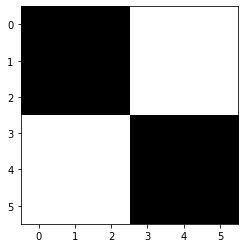

In [29]:
# Faca aqui seus testes do Exercício 6.8
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

# Veja no exemplo abaixo como mostrar um array em forma de image para você ter o feedback se está indo no caminho certo
b = 255 
p = 0 
tile = np.array([[p,p,p,b,b,b],
                 [p,p,p,b,b,b],
                 [p,p,p,b,b,b],
                 [b,b,b,p,p,p], 
                 [b,b,b,p,p,p],
                 [b,b,b,p,p,p]
                 ], dtype=np.uint8)

imshow(tile, cmap='gray', vmin=0, vmax=255)



In [30]:
# Faca aqui sua função do Exercício 6.8
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

def pattern_image(tile_size, rep):
    ### BEGIN SOLUTION
    a = np.zeros((tile_size, tile_size), np.uint8)
    np.fill_diagonal(a, 255)
    x = a | np.flip(a, 0)
    arr_tiles = np.tile(x, (rep,rep))
    return arr_tiles
    ### END SOLUTION


In [31]:
# Faca aqui a validacao do Exercicio 6.8
entradas = [[9, 3]]
result = np.array([[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255],
[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255],
[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255]],dtype=np.uint8)
saidas = [result]
validate(pattern_image, entradas, lambda x: x, saidas, "6.8")

(True, 'Parabéns!')